[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/HW4.ipynb)

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from matplotlib import pyplot as plt
import os

###Below you will find some function to be used to download the time series, do not miss any single step, in which case you may receive errors.  
---
### Run the following cell to download your time series!!!!
---

In [10]:
data=pd.read_csv("data_setforHW4.csv")

##Step 0: Read the csv file, named "data_setforHW4.csv" using pandas, call this pd series time_series. Using .iloc function pick up the right column! Inspect the data closely.

##Step 1:Visualize the data. Do you see any unit root kinda thing?


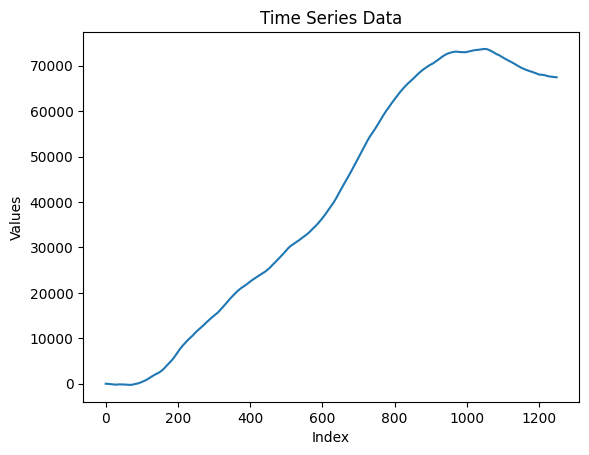

In [11]:
time_series = data.iloc[:, 1]

plt.plot(time_series)
plt.title("Time Series Data")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()


##Step 2: Check whether if it has a unit root.

In [13]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: -2.5928104643506433
p-value: 0.0944923213307779


##Step3: if it has a unit root, take as many differences as it is needed.

In [15]:
differenced_series = time_series.diff().dropna()

adf_test_diff = adfuller(differenced_series)
print("Differenced ADF Statistic:", adf_test_diff[0])
print("Differenced p-value:", adf_test_diff[1])


differenced_series = differenced_series.diff().dropna()

adf_test_diff_2 = adfuller(differenced_series)
print("Twice-Differenced ADF Statistic:", adf_test_diff_2[0])
print("Twice-Differenced p-value:", adf_test_diff_2[1])


Differenced ADF Statistic: -1.248220894279435
Differenced p-value: 0.6525162072584403
Twice-Differenced ADF Statistic: -13.662393296655292
Twice-Differenced p-value: 1.512757828384733e-25


##Step 4: Save the differenced series, as differenced_series.

In [16]:
differenced_series = differenced_series

## Step 5: [Here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html#statsmodels.tsa.stattools.arma_order_select_ic), determine the orders p and q of an ARMA(p,q) process. Read the webpage carefully. Use this function to determine the orders p and q to fit the right ARMA model to the **differenced data**. Here do not use the original time series, use the differenced_series that you should have obtained in Step 4.

In [17]:
from statsmodels.tsa.stattools import arma_order_select_ic

order_selection = arma_order_select_ic(differenced_series, ic='aic', max_ar=5, max_ma=5)
p, q = order_selection.aic_min_order
print("Selected p:", p)
print("Selected q:", q)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

Selected p: 2
Selected q: 2


##Step 6: Now, fit ARIMA(p, d, q) model to your original time series that you downloaded in Step 0, with the parameters p and q that you should have found in Step 5, and the order of differencing d that you should have determined in Step 3.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the original time series with the identified parameters
model = ARIMA(time_series, order=(p, 2, q))
fitted_model = model.fit()

# Display summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1250
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1801.186
Date:                Tue, 12 Nov 2024   AIC                           3612.373
Time:                        12:33:07   BIC                           3638.019
Sample:                             0   HQIC                          3622.015
                               - 1250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8125      0.066     12.347      0.000       0.684       0.941
ar.L2         -0.3059      0.054     -5.696      0.000      -0.411      -0.201
ma.L1          0.5780      0.065      8.853      0.0

## Step 7: Visualize the residuals, and do Ljhung-Box test to see if the residuals are seriously correlated. Do not forget to set, model_df = p+q (in Step 5).

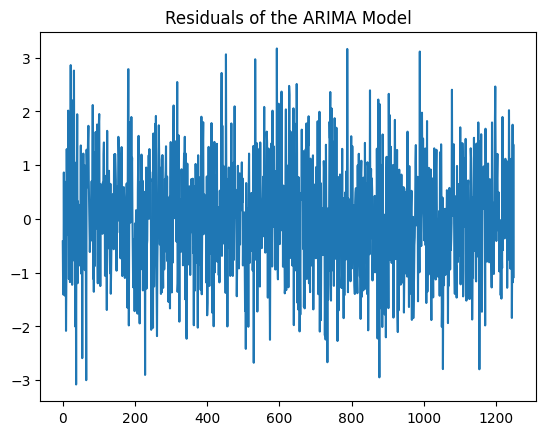

Ljung-Box Test p-value: 0.9681208941970875


In [19]:
import statsmodels.api as sm

residuals = fitted_model.resid
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.show()

ljung_box_result = sm.stats.acorr_ljungbox(residuals, lags=[10], model_df=(p + q))
print("Ljung-Box Test p-value:", ljung_box_result['lb_pvalue'].values[0])


##Step 8: If you come so far, lean now back, grab a coffee and congrats yourself! (and download and upload this file to LMS system)
